## Plotting ESHI simulation inputs and results

Rachel Middleton

In [3]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from netCDF4 import Dataset

In [4]:
# input paths
# inputfile = 'ESHI.input.nc'
inputfile = 'SteadyStateA/ESHI.SteadyStateA.out.nc'


In [5]:
# read data
ncfile = Dataset(inputfile, 'r')

In [6]:
print(ncfile.variables.keys())

# print the shape of each variable
for var in ncfile.variables.keys():
    print(var, ncfile.variables[var].shape)

dict_keys(['internal_time', 'time', 'tstep_count', 'level', 'lithoz', 'nlev_smb', 'staglevel', 'stagwbndlevel', 'x0', 'x1', 'y0', 'y1', 'zocn', 'beta_internal', 'effecpress', 'head', 'ivol', 'thk', 'topg', 'ubas', 'usfc', 'usurf', 'vbas', 'vsfc'])
internal_time (1,)
time (1,)
tstep_count (1,)
level (5,)
lithoz (20,)
nlev_smb (1,)
staglevel (4,)
stagwbndlevel (6,)
x0 (24,)
x1 (25,)
y0 (4,)
y1 (5,)
zocn (1,)
beta_internal (1, 4, 24)
effecpress (1, 5, 25)
head (1, 5, 25)
ivol (1,)
thk (1, 5, 25)
topg (1, 5, 25)
ubas (1, 4, 24)
usfc (1, 4, 24)
usurf (1, 5, 25)
vbas (1, 4, 24)
vsfc (1, 4, 24)


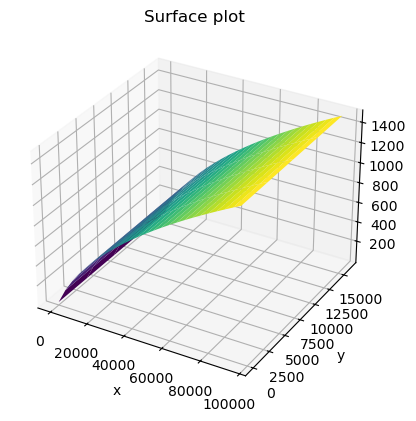

In [7]:
# plot the input geometry
# plot the 2d variable thk with x1 and y1 variables as x and y axes
fig = plt.figure()
ax = plt.axes(projection='3d')
x = ncfile.variables['x1'][:]
y = ncfile.variables['y1'][:]
X, Y = np.meshgrid(x, y)
Z = ncfile.variables['thk'][0][:]
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('Surface plot')
# x and y labels
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()




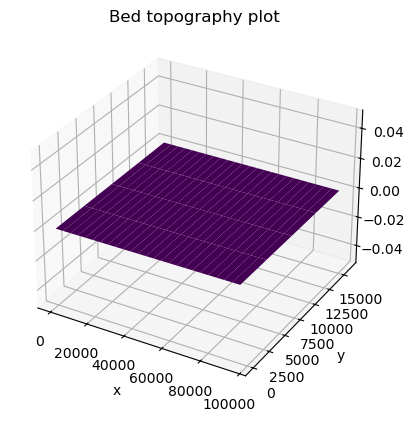

In [8]:
# plot the input geometry
# plot the 2d variable thk with x1 and y1 variables as x and y axes
fig = plt.figure()
ax = plt.axes(projection='3d')
x = ncfile.variables['x1'][:]
y = ncfile.variables['y1'][:]
X, Y = np.meshgrid(x, y)
Z = ncfile.variables['topg'][0][:]
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('Bed topography plot')
# x and y labels
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

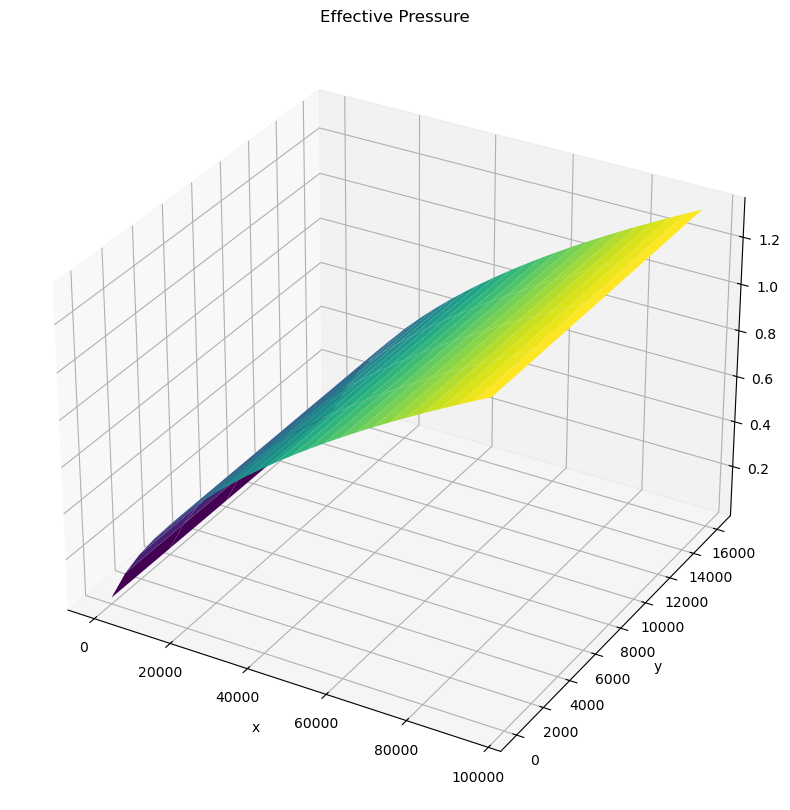

In [20]:
# plot the input geometry
# plot the 2d variable thk with x1 and y1 variables as x and y axes

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
x = ncfile.variables['x1'][:]
y = ncfile.variables['y1'][:]
X, Y = np.meshgrid(x, y)
Z = ncfile.variables['effecpress'][0][:]
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('Effective Pressure')

ax.set_zlim(Z.min(), Z.max())


# x and y labels
ax.set_xlabel('x')
ax.set_ylabel('y')


plt.show()



In [22]:
# make a comparison of all experiements from run A
# read data
inputfileA = 'SteadyStateA/ESHI.SteadyStateA.out.nc'
inputfileB = 'SteadyStateB/ESHI.SteadyStateB.out.nc'
inputfileC = 'SteadyStateC/ESHI.SteadyStateC.out.nc'
inputfileD = 'SteadyStateD/ESHI.SteadyStateD.out.nc'
inputfileE = 'SteadyStateE/ESHI.SteadyStateE.out.nc'
inputfileF = 'SteadyStateF/ESHI.SteadyStateF.out.nc'


ncfileA = Dataset(inputfileA, 'r')
ncfileB = Dataset(inputfileB, 'r')
ncfileC = Dataset(inputfileC, 'r')
ncfileD = Dataset(inputfileD, 'r')
ncfileE = Dataset(inputfileE, 'r')
ncfileF = Dataset(inputfileF, 'r')

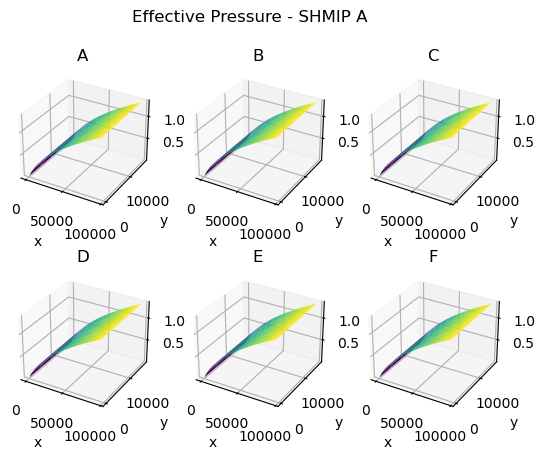

In [23]:
# make a comparison plot

def make_subplot(ax,ncfile,title):
    x = ncfile.variables['x1'][:]
    y = ncfile.variables['y1'][:]
    X, Y = np.meshgrid(x, y)
    Z = ncfile.variables['effecpress'][0][:]
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                    cmap='viridis', edgecolor='none')
    ax.set_title(title)
    # x and y labels
    ax.set_xlabel('x')
    ax.set_ylabel('y')

fig = plt.figure()


ax1 = fig.add_subplot(231, projection='3d')
make_subplot(ax1,ncfileA,'A')

ax2 = fig.add_subplot(232, projection='3d')
make_subplot(ax2,ncfileB,'B')

ax3 = fig.add_subplot(233, projection='3d')
make_subplot(ax3,ncfileC,'C')

ax4 = fig.add_subplot(234, projection='3d')
make_subplot(ax4,ncfileD,'D')

ax5 = fig.add_subplot(235, projection='3d')
make_subplot(ax5,ncfileE,'E')

ax6 = fig.add_subplot(236, projection='3d')
make_subplot(ax6,ncfileF,'F')

plt.suptitle('Effective Pressure - SHMIP A')

plt.show()

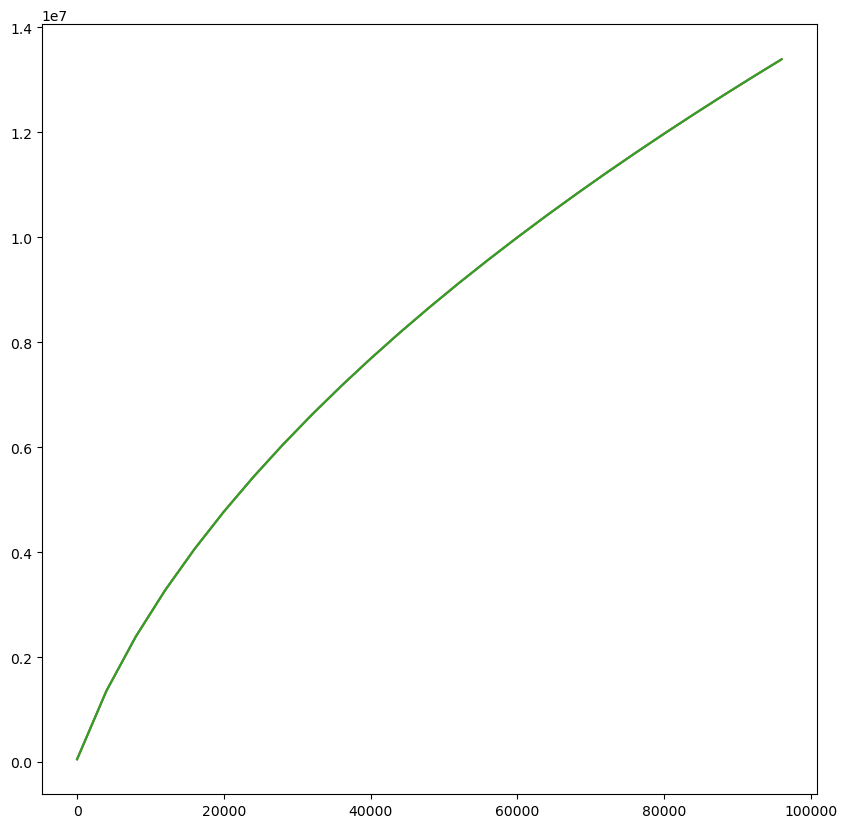

In [25]:
fig = plt.figure(figsize=(10, 10))

plt.plot(x, ncfileA.variables['effecpress'][0][0])
plt.plot(x, ncfileB.variables['effecpress'][0][0])
plt.plot(x, ncfileC.variables['effecpress'][0][0])
# plt.plot(x, ncfileD.variables['effecpress'][0][0])

plt.show()